

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Trabalho muito sólido com o projeto! Gostei muito.
    
    
Parabéns pela aprovação e até breve!
</div>


In [1]:
# Bibliotecas importatas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importando os dois datasets
df_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
df_destinations = pd.read_csv('/datasets/project_sql_result_04.csv')

In [21]:
# Verificando as 5 primeiras linhas
print("Dados de corridas por empresa:")
print(df_trips.head(10))

print("\nDados de destinos médios por bairro:")
print(df_destinations.head())

Dados de corridas por empresa:
                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953

Dados de destinos médios por bairro:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [4]:
print("\nTipos de dados - df_trips:")
print(df_trips.dtypes)

print("\nTipos de dados - df_destinations:")
print(df_destinations.dtypes)


Tipos de dados - df_trips:
company_name    object
trips_amount     int64
dtype: object

Tipos de dados - df_destinations:
dropoff_location_name     object
average_trips            float64
dtype: object


In [5]:
# Tudo certo com os dados


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>


In [6]:
df_top10 = df_destinations.sort_values(by='average_trips', ascending=False).head(10)
print("\nTop 10 bairros como destinos:")
print(df_top10)


Top 10 bairros como destinos:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


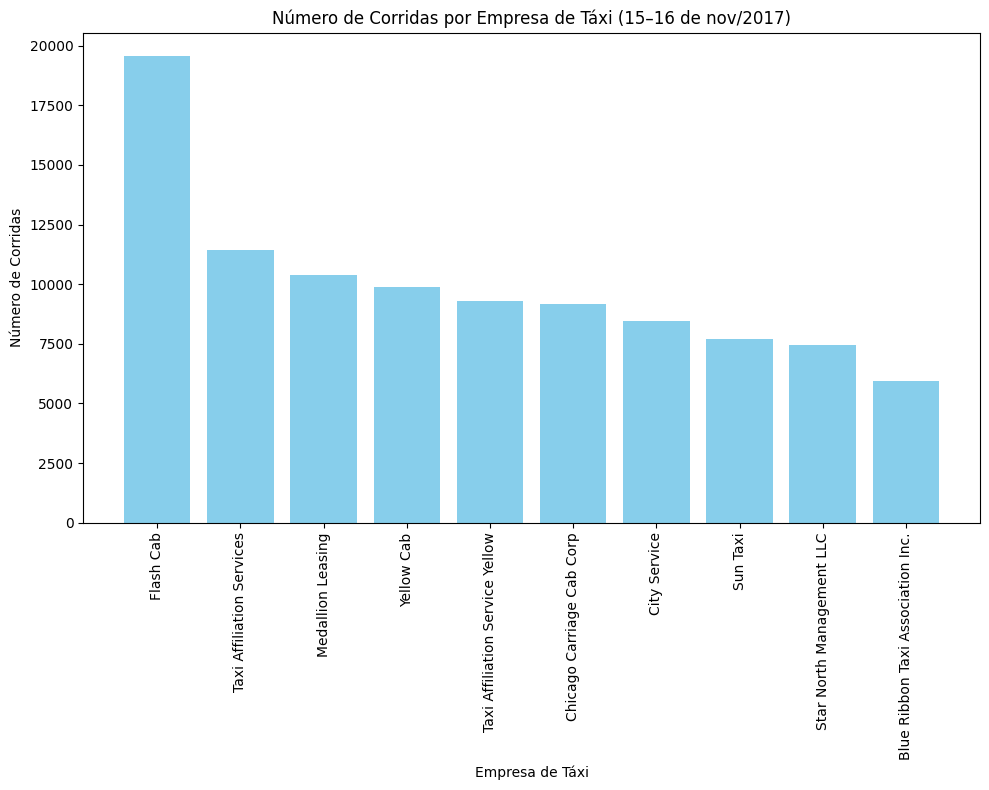

In [27]:
plt.figure(figsize=(10, 8))
plt.bar(df_trips.head(10)['company_name'], df_trips.head(10)['trips_amount'], color='skyblue')
plt.title('Número de Corridas por Empresa de Táxi (15–16 de nov/2017)')
plt.xlabel('Empresa de Táxi')
plt.ylabel('Número de Corridas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

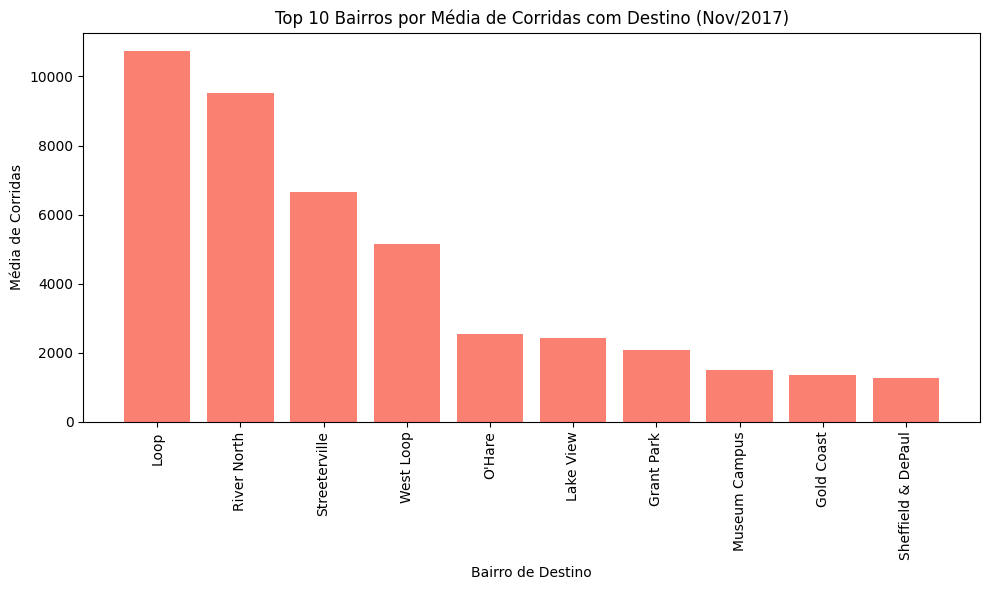

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(df_top10['dropoff_location_name'], df_top10['average_trips'], color='salmon')
plt.title('Top 10 Bairros por Média de Corridas com Destino (Nov/2017)')
plt.xlabel('Bairro de Destino')
plt.ylabel('Média de Corridas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [30]:
# Empresa flash cab tem uma demanda significativa maior em relação as demais empresas, que competem entre si pelo posto de segundo lugar. As regiões mais procuradas de viagens são destinos como: Loop e River North.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Ambas as visualizações foram implementadas conforme o solicitado e permitem ver com clareza os itens que se destacam em cada uma das dimensões.
</div>


# H₀ (hipótese nula):
# A média da duração das viagens nos sábados chuvosos é igual à média nos 
# sábados com bom tempo. → μ₁ = μ₂

# H₁ (hipótese alternativa):
# As médias são diferentes.
# → μ₁ ≠ μ₂

In [33]:
from scipy.stats import ttest_ind

# 1. Carregar os dados
df = pd.read_csv('/datasets/project_sql_result_07.csv')
df['start_ts'] = pd.to_datetime(df['start_ts'])

# 2. Filtrar apenas os sábados
df['weekday'] = df['start_ts'].dt.day_name()
df_saturday = df[df['weekday'] == 'Saturday']

# 3. Separar as durações por condição climática
bad_weather = df_saturday[df_saturday['weather_conditions'] == 'Bad']['duration_seconds']
good_weather = df_saturday[df_saturday['weather_conditions'] == 'Good']['duration_seconds']

# 4. Executando o t-test 
alpha = 0.05
t_stat, p_value = ttest_ind(bad_weather, good_weather, equal_var=False)

print(f'Estatística t: {t_stat:.3f}')
print(f'Valor-p: {p_value:.4f}')

# 5. Resultado:
if p_value < alpha:
    print("❌ Rejeitamos H₀: Há diferença significativa na duração média das viagens em sábados chuvosos.")
else:
    print("✅ Não rejeitamos H₀: Não há evidência de diferença na duração média das viagens.")

Estatística t: 7.186
Valor-p: 0.0000
❌ Rejeitamos H₀: Há diferença significativa na duração média das viagens em sábados chuvosos.


In [ ]:
#faz sentido uma vez que tempos ruins tentem geralmente a fazer com que o trânsito fique mais lento.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

O teste foi formulado, implementado e analisado corretamente. Muito bom!
</div>

